In [13]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from matplotlib.legend_handler import HandlerLine2D
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
np.random.seed(7)
warnings.filterwarnings('ignore')

X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X, Y)

In [14]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]

In [15]:
# vary activation funcs & solvers

activations = ['relu', 'tanh', 'logistic', 'identity']
solvers = ['adam', 'sgd', 'lbfgs']

for a in activations: 
    print a
    clf = MLPClassifier(activation=a, alpha=0.001, batch_size='auto', beta_1=0.9,beta_2=0.999, \
                        early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(100), \
                        learning_rate_init=0.001, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5,\
                        random_state=1, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,\
                        verbose=False, warm_start=False)
    clf.fit(Xtr, Ytr)                         
    YvaP = clf.predict(Xva)
    auc = roc_auc_score(Yva, YvaP)
    print "auc: ", auc

relu
auc:  0.524523652638
tanh
auc:  0.55739640857
logistic
auc:  0.565409308542
identity
auc:  0.589713691139


In [16]:
# vary number of nodes (layer1)

n = 50
nodes = []
aucs = []
while n <= 500:
    print n
    nodes.append(n)
    clf = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,beta_2=0.999, \
                        early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(n), \
                        learning_rate_init=0.001, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5,\
                        random_state=1, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,\
                        verbose=False, warm_start=False)
    clf.fit(Xtr, Ytr)                         
    YvaP = clf.predict(Xva)
    auc = roc_auc_score(Yva, YvaP)
    print "auc: ", auc
    aucs.append(auc)
    n += 50

50
auc:  0.590706957114
100
auc:  0.524523652638
150
auc:  0.553749564119
200
auc:  0.593938969354
250
auc:  0.506554332249
300
auc:  0.552210719736
350
auc:  0.564754743939
400
auc:  0.51021689303
450
auc:  0.558548110494
500
auc:  0.595057902063


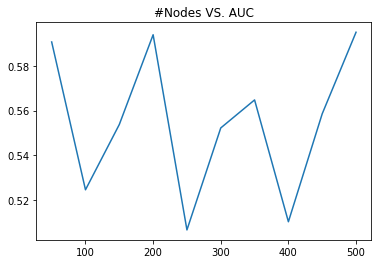

In [17]:
plt.title("#Nodes VS. AUC")
plt.plot(nodes, aucs)
plt.show()

In [19]:
# vary number of nodes (layer2)

n = 10
nodes = []
aucs = []
while n < 100:
    print n
    nodes.append(n)
    clf = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,beta_2=0.999, \
                        early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(450, n), \
                        learning_rate_init=0.001, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5,\
                        random_state=1, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,\
                        verbose=False, warm_start=False)
    clf.fit(Xtr, Ytr)                         
    YvaP = clf.predict(Xva)
    auc = roc_auc_score(Yva, YvaP)
    print "auc: ", auc
    aucs.append(auc)
    n += 10

10
auc:  0.5
20
auc:  0.584108337935
30
auc:  0.584283790647
40
auc:  0.579555892734
50
auc:  0.582565575583
60
auc:  0.582721630187
70
auc:  0.56498505098
80
auc:  0.558476253297
90
auc:  0.582773155632


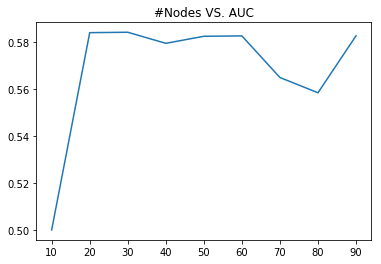

In [20]:
plt.title("#Nodes VS. AUC")
plt.plot(nodes, aucs)
plt.show()

In [21]:
# settings: 
# -activation func: relu
# -solver: adam
# -layer 1 => 450 nodes
# -layer 2 => 20 nodes

clf = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,beta_2=0.999, \
                        early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(450, 20), \
                        learning_rate_init=0.001, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5,\
                        random_state=1, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,\
                        verbose=False, warm_start=False)
clf.fit(Xtr, Ytr)                         
YvaP = clf.predict(Xva)
auc = roc_auc_score(Yva, YvaP)
print "auc: ", auc

auc:  0.584108337935
